# Project: Investigate a Dataset: 
# Characteristics of No-Shows for Medical Appointments in Brazil and Effectiveness of SMS-Reminders

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains data of around 110k medical appointments and whether the patient showed up or not. The dataset comes with additional information to each appointment such as: gender, age, date of scheduling, date of actual appointment, neighborhood, scholarship (more detailed information below), sms-reminded as well as an indication for one or more diseases, the patient might suffer. The possible options for these diseases are: hypertension, diabetes, alcoholism, handicap (not further declared).

The original dataset has been sourced from Kaggle <a href="https://www.kaggle.com/joniarroba/noshowappointments">Dataset: Medical Appointment No Shows</a> on 29th October 2018.

**Concept of Scholarship:** States if the patient’s family participates in a social welfare program of the government, providing financial aid to poor families. For participation certain conditions have to be fulfilled. Examples of these conditions are: children need to attend to school or need to be vaccinated. Source and further information: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

### Research Questions
At first I want to study parts of the bigger picture using the given data of the data set. That means using the "per appointment based meta-data" to study conditions and relationsships to 'no shows'. 
<ol>
<li>What is the relationship between the following personal parts of information and no-shows?</li>
<ol>
    <li>Diseases</li>
    <li>Neighborhood</li>
</ol>

The second part of the analysis shall look out for opportunities to improve conditions for better performance. Therefore, I want to study on options to improve the situation from the administrative end:
<li>Did SMS-reminders decrease the proportion of patients not showing up?</li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('noshowappointments-original-source-KaggleV2-May-2016.csv') 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


All columns are read in properly. The created index could come in handy, as the one PatiendID might not be a unique identifyer since one can have multiple appointments.

In [4]:
#What size does the table, now dataframe have?
df.shape

(110527, 14)

In [5]:
sum(df.duplicated())

0

In [6]:
#Getting to know the rough value distribution of each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Get an overview over the colums types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### General Observations
<ul>
<li>The dataset has 14 colums and 110.527 rows, no duplicates.</li>
<br>
**Data types**
<li>The types of ScheduledDay and Appointmentday need converted to DateTime</li>
<li>The types of colums Scholarschip till No-show need to be inspected and ideally converted to boolean for more precise value definition and easier handling.</li>
<br>
**Values and Distribution **
<li>No missing values, since each column  has 110.527 values.</li>
<li>With min values of 0 and max values of 1 the columns Scholarship, Hipertension, Diaetes, Alcoholism and SMS_received are dichotomous.</li>
 <li>The column Handcap seems to have more detail as we here see a max value of 4. A closer look to the value distribution is needed.</li>
<li>To answer the research questions, the columns PatiendID and AppointmentID do not seem necessary and will therefore be dropped.</li>
<li>The min value -1 of the Age-colum seems odd and will therefore be inspected. The max value is quite high. Although realistic, it is worth a closer look.</li>
</ul>

### Data Cleaning

In [8]:
#Inspection of colums ScheduledDay and AppointmentDay
print(df['ScheduledDay'].head())
print('\n')
print(df['AppointmentDay'].head())

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object


0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


Inspection reveals that the columns need to be converted to datetime in case we want to calculate the lead time between arranging the appointment and the actual appointment. In addition, values end of the letter 'Z' which has no meaning to me. That needs to be cleaned. Both columns can be treated equal.

Source applied for the conversion: https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects and https://stackoverflow.com/questions/43316608/remove-timestamp-from-date-string-in-python

In [9]:
#Testing, how the conversion works for an individual string first.
testdate_raw = '2016-04-29T18:38:08Z'
testdate_converted = datetime.strptime(testdate_raw, '%Y-%m-%dT%H:%M:%SZ')
print(testdate_converted)

2016-04-29 18:38:08


In [10]:
# Applying this to the whole columns using the .to_datetime() method in panads
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())
print('\n')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


Note: The column Appointmentday has time stamps without real values. This should be no further concern.

In [11]:
# List of colums to be converted to boolean.
bool_columns=['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap', 'SMS_received', 'No-show']

# Value inspection of the columns. Iterating through the concerning columns.
for column in df[bool_columns]:
    print(df[column].value_counts())
    print('\n')

0    99666
1    10861
Name: Scholarship, dtype: int64


0    88726
1    21801
Name: Hipertension, dtype: int64


0    107167
1      3360
Name: Alcoholism, dtype: int64


0    102584
1      7943
Name: Diabetes, dtype: int64


0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


0    75045
1    35482
Name: SMS_received, dtype: int64


No     88208
Yes    22319
Name: No-show, dtype: int64




Conclusion: All values of the columns are dichotomous, except those from columns 'Handcap' and 'No-show'. 
This means, before converting to boolean the column names 'Handcap' and 'No-Show' need to be removed from the list.

In [12]:
bool_columns.remove('Handcap')
bool_columns.remove('No-show')
print(bool_columns)

['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received']


In [13]:
for column in df[bool_columns]:
    #Conversion to boolean, by iterating through concerning colums.
    df[column] = df[column].astype('bool', inplace=True)
    
    #Check conversion took place corretly?
    print(df[column].value_counts())
    print('\n')

#Check whether conversion took place correctly. Answer: yes, identitical amounts of '0' resp. 'False' and  
# '1' resp. 'True' values.

False    99666
True     10861
Name: Scholarship, dtype: int64


False    88726
True     21801
Name: Hipertension, dtype: int64


False    107167
True       3360
Name: Alcoholism, dtype: int64


False    102584
True       7943
Name: Diabetes, dtype: int64


False    75045
True     35482
Name: SMS_received, dtype: int64




As the column Handcap has not been dichotomous, detailed inspection is needed.

In [14]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The value distribution implies differentiations of the handicap-degree. 0 appears to be no handicap. The amounts of each degree are quite low, especially from degree 2 on. For the porpuse of analysis, we shall copy that column and combine the values of degree 1 to 4 to "1 = handicap present".

In [15]:
df['Handcap-combined'] = df['Handcap'].astype('bool')
df['Handcap-combined'].value_counts()

False    108286
True       2241
Name: Handcap-combined, dtype: int64

The conversion has been executed correctly. Now, to check whether the new column is included in the dataframe?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId           110527 non-null float64
AppointmentID       110527 non-null int64
Gender              110527 non-null object
ScheduledDay        110527 non-null datetime64[ns]
AppointmentDay      110527 non-null datetime64[ns]
Age                 110527 non-null int64
Neighbourhood       110527 non-null object
Scholarship         110527 non-null bool
Hipertension        110527 non-null bool
Diabetes            110527 non-null bool
Alcoholism          110527 non-null bool
Handcap             110527 non-null int64
SMS_received        110527 non-null bool
No-show             110527 non-null object
Handcap-combined    110527 non-null bool
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 8.2+ MB


The new column Handcap-combined has successfully been included.

From previous inspection, we have seen the column No-show is dichotomous, but in the type 'object' instead of boolean. The reason is the usage of the values 'yes' and 'no'.

In [17]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

For a conversion to type boolean '1' and '0' instead of 'No' and 'Yes' as values is needed.

In [18]:
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace = True)

Now, that the values have been replaced, we can convert the type to boolean.

In [19]:
df['No-show'] = df['No-show'].astype('bool', inplace=True)

In [20]:
df['No-show'].value_counts()

False    88208
True     22319
Name: No-show, dtype: int64

As explained at the beginning we can drop both ID columns.

In [21]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Since we dropped columns with unique identifiers, we run a security check on duplicate rows, as it might have happened that the same appointment has been recorded mulitiple times, but just with unique AppointmentIDs. This fault can happen when recording systems are generating IDs automatically and in case the user is not able to alter an existing entry and is then forced to insert a the entry newly.

In [22]:
sum(df.duplicated())

635

Printing the value distribution of the column ScheduledDay to check for the above explained "hidden duplicates".

In [23]:
df['ScheduledDay'].value_counts()

2016-05-06 07:09:54    24
2016-05-06 07:09:53    23
2016-04-25 17:18:27    22
2016-04-25 17:17:46    22
2016-04-25 17:17:23    19
2016-04-25 17:19:03    15
2016-05-31 09:54:52    15
2016-05-10 08:18:24    15
2016-06-07 16:15:14    14
2016-05-03 07:52:31    14
2016-05-25 09:36:45    13
2016-05-09 08:07:11    13
2016-05-10 08:29:24    13
2016-03-29 10:44:23    13
2016-05-13 08:54:09    12
2016-05-25 16:34:32    12
2016-05-12 13:58:44    11
2016-04-18 15:43:23    11
2016-05-13 08:38:50    11
2016-05-20 14:10:56    11
2016-03-29 10:43:41    11
2016-06-03 08:51:28    11
2016-04-18 15:39:02    11
2016-04-25 16:24:42    11
2016-05-06 08:04:41    11
2016-05-04 08:51:42    11
2016-05-20 13:06:03    11
2016-04-18 15:40:28    11
2016-05-10 17:35:47    11
2016-05-19 13:43:43    11
                       ..
2016-04-27 11:00:22     1
2016-04-27 14:40:25     1
2016-06-06 07:35:49     1
2016-04-14 09:11:44     1
2016-06-06 10:03:15     1
2016-05-03 08:36:58     1
2016-05-25 14:54:44     1
2016-06-02 0

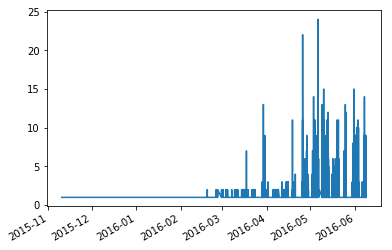

In [24]:
df['ScheduledDay'].value_counts().plot();

It seems odd, that there are so many entries scheduled the exact same date, hour, minute and second. As the amount of duplicate rows is quite low in comparison to the total amount of entries in the dataset, let's try if this looks better, once they have been deleted.

In [25]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [26]:
df['ScheduledDay'].value_counts()

2016-05-06 07:09:54    23
2016-05-06 07:09:53    23
2016-04-25 17:17:46    22
2016-04-25 17:18:27    22
2016-04-25 17:17:23    19
2016-04-25 17:19:03    15
2016-05-31 09:54:52    15
2016-05-10 08:18:24    14
2016-03-29 10:44:23    13
2016-06-07 16:15:14    13
2016-05-25 09:36:45    13
2016-05-03 07:52:31    13
2016-05-09 08:07:11    13
2016-05-10 08:29:24    13
2016-05-13 08:54:09    12
2016-04-25 16:24:42    11
2016-05-25 16:34:32    11
2016-05-20 14:10:56    11
2016-06-03 08:51:28    11
2016-05-13 08:38:50    11
2016-04-18 15:40:28    11
2016-05-20 13:06:03    11
2016-04-18 15:39:02    11
2016-05-04 08:51:42    11
2016-03-29 10:43:41    11
2016-05-19 13:43:43    11
2016-04-18 15:43:23    11
2016-05-12 13:58:44    11
2016-05-06 08:04:41    11
2016-05-10 17:35:47    10
                       ..
2016-04-28 08:23:37     1
2016-05-30 14:33:14     1
2016-06-06 08:12:19     1
2016-04-18 08:57:57     1
2016-05-19 08:40:17     1
2016-05-31 10:23:13     1
2016-05-11 11:29:13     1
2016-05-24 0

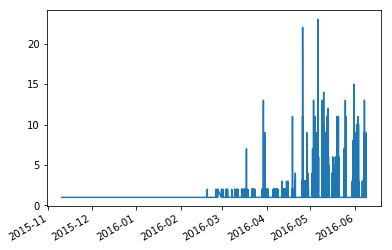

In [27]:
df['ScheduledDay'].value_counts().plot();

Although a few values vanished after removal of these duplicates, the value distribution of ScheduledDay looks the same. These at first odd seeming values now appear valid.

From the first inspection of the dataset, we know that there is a '-1' and a '115' value present in the column Age.

In [28]:
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap-combined
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,False,False


It seems that the value has just been recorded incorrectly. We can therefore delete that row.

In [29]:
df.drop([99832], inplace=True)

In [30]:
df.loc[df['Age'] == 115]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap-combined
63912,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,1,False,True,True
68127,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,1,False,True,True
76284,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,1,False,False,True
97666,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,0,True,False,False


There are four rows where the age is stated 115. According to Wikipedia there are only very few people still alive at that age, however we seem to have the appointment data of just two individuals as the first three rows appear to belong to the same patient.

Now that we have finished the cleaning work, we can save the cleaned dataframe to another .csv-file. We shall now continue with the explorative analysis.

In [31]:
df.to_csv('noshowappointments-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is there a relationship between the following personal parts of information and no-shows?
<ol>
<li>Diseases</li>
<li>Neighbourhood</li></ol>

In [32]:
dfc = pd.read_csv('noshowappointments-May-2016-cleaned.csv')
#dfc acronym from df_cleaned

#### 1. Analysis per Disease

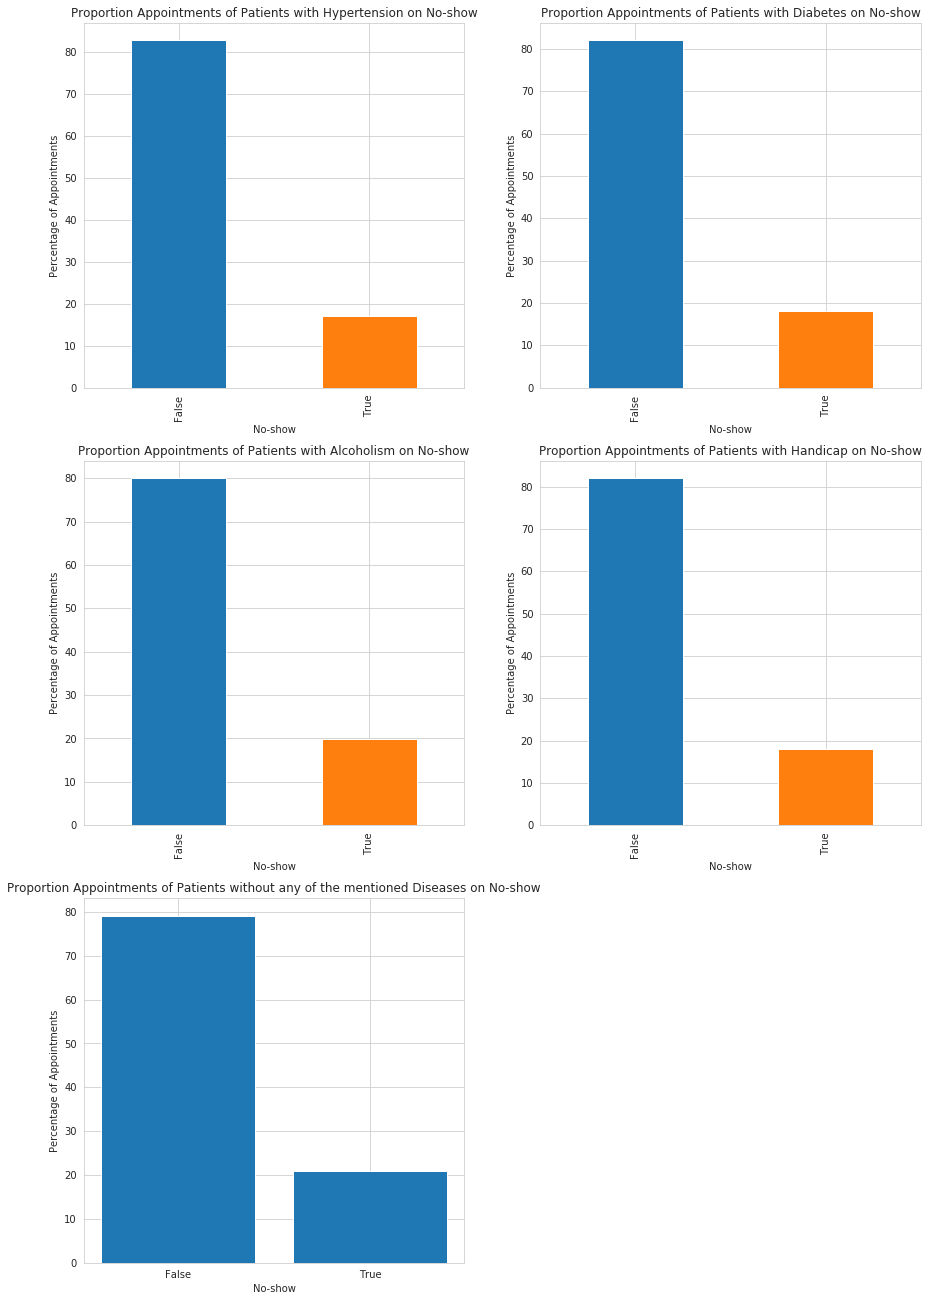

In [44]:
#For comparison, extracting patients without a stated disease into separate dataframes.
df_no_disease_showed_up = dfc[(dfc['No-show'] == False) & (dfc['Hipertension'] == False) & (dfc['Diabetes'] == False) & (dfc['Alcoholism'] == False) & (dfc['Handcap'] == False)]
df_no_disease_no_show = dfc[(dfc['No-show'] == True) & (dfc['Hipertension'] == False) & (dfc['Diabetes'] == False) & (dfc['Alcoholism'] == False) & (dfc['Handcap'] == False)]

#Calculation the total amounts of appointments per disease for proportion calculuation later on.
amount_no_disease = df_no_disease_showed_up['AppointmentDay'].count() + df_no_disease_no_show['AppointmentDay'].count()
amount_Hipertension = sum(dfc.groupby(['No-show']).sum()['Hipertension'])
amount_Diabetes = sum(dfc.groupby(['No-show']).sum()['Diabetes'])
amount_Alcoholism = sum(dfc.groupby(['No-show']).sum()['Alcoholism'])
amount_Handcap_combined = sum(dfc.groupby(['No-show']).sum()['Handcap-combined'])

#Calculation the proportions of No-show and Show-up per disease and for no-disease
hipertension = dfc.groupby(['No-show']).sum()['Hipertension']/amount_Hipertension *100
diabetes = dfc.groupby(['No-show']).sum()['Diabetes']/amount_Diabetes * 100
alcoholism = dfc.groupby(['No-show']).sum()['Alcoholism']/amount_Alcoholism * 100
handcap_combined = dfc.groupby(['No-show']).sum()['Handcap-combined']/amount_Handcap_combined * 100
no_disease_showed_up_proportion = df_no_disease_showed_up['AppointmentDay'].count() / amount_no_disease * 100
no_disease_no_show_proportion = df_no_disease_no_show['AppointmentDay'].count() / amount_no_disease * 100


#Plotting results of calculations above.
# Styling the graphs
fig = plt.figure(figsize=(15,55)) 
sns.set_style('whitegrid')

# Defining the graphs
plt.subplot(7,2,1)
hipertension.plot.bar()
plt.title('Proportion Appointments of Patients with Hypertension on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,2)
diabetes.plot.bar()
plt.title('Proportion Appointments of Patients with Diabetes on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,3)
alcoholism.plot.bar()
plt.title('Proportion Appointments of Patients with Alcoholism on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,4)
handcap_combined.plot.bar()
plt.title('Proportion Appointments of Patients with Handicap on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,5)
plt.bar(["False","True"], [no_disease_showed_up_proportion, no_disease_no_show_proportion]);
plt.title('Proportion Appointments of Patients without any of the mentioned Diseases on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments');

The graphs above show the proportions of appointments with no-show (False, True) per disease.

The highest proportion of "No-shows" has the group of patients without any of the mentioned diseases. The lowest has the group of patients with a handicap. However, we can identify the trend that whatever disease a patient might suffer, he is overall a bit more reliable in terms of showing up, compared to those without a disease. Since all diseases show very similar Show and No-show proportions, the type of the disease does not appear to have a relationship with the no-show proportions.

#### 2. Analysis of Neighboarhood

Let us first get an overview of the variety of the neighborhoods.

In [34]:
dfc['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7616
MARIA ORTIZ                    5804
RESISTÊNCIA                    4387
JARDIM DA PENHA                3873
ITARARÉ                        3470
CENTRO                         3310
TABUAZEIRO                     3123
SANTA MARTHA                   3103
JESUS DE NAZARETH              2852
BONFIM                         2761
SANTO ANTÔNIO                  2733
SANTO ANDRÉ                    2556
CARATOÍRA                      2541
JABOUR                         2507
SÃO PEDRO                      2431
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2263
DA PENHA                       2203
ROMÃO                          2196
ANDORINHAS                     2194
GURIGICA                       2008
SÃO JOSÉ                       1963
BELA VISTA                     1894
MARUÍPE                        1891
ILHA DE SANTA MARIA            1885
FORTE SÃO JOÃO                 1864
SÃO CRISTÓVÃO                  1831
REDENÇÃO                    

There are 81 different neighborhoods present in the dataset. The majority has than 100 appointments. Hence the big picture appears not to be too fragmented. The amounts are high enough for simple analysis. However, for reasons of overview we shall concentrate us on the top 15 neighborhoods.

In [35]:
hood_no_shows = dfc.groupby('Neighbourhood').sum()['No-show']
#Since the column No-show is type boolean, we have to think about how the grouping calculation is done? When grouping with 
#type boolean the value True is set equal to 1 and can therefore be summarized in this way.

Since each neighborhood is unequal in terms of amount inhabitants and their appointments, we need to calculate proportions of No-shows and amount of appointments per neighborhood.

Converting the series hood_no_shows to a dataframe to be able to merge in the amounts of appointments per hood later on.

In [36]:
df_no_shows_per_hood = hood_no_shows.to_frame()
df_no_shows_per_hood.reset_index(inplace=True)
df_no_shows_per_hood.rename(columns={df_no_shows_per_hood.columns[0]: "Neighbourhood", df_no_shows_per_hood.columns[1]: "No-shows"}, inplace=True)
df_no_shows_per_hood.sort_values(ascending=False, by='No-shows', inplace=True)
df_no_shows_per_hood.head()

,Neighbourhood,No-shows
38,JARDIM CAMBURI,1429.0
43,MARIA ORTIZ,1219.0
36,ITARARÉ,902.0
59,RESISTÊNCIA,885.0
40,JESUS DE NAZARETH,695.0


Calculating the amount of appointments per neighborhood and putting them into a dataframe.

In [37]:
amount_appointments_per_hood = dfc['Neighbourhood'].value_counts()
df_amount_appointments_per_hood = amount_appointments_per_hood.to_frame()
df_amount_appointments_per_hood.reset_index(inplace=True)
df_amount_appointments_per_hood.rename(columns={df_amount_appointments_per_hood.columns[0]: "Neighbourhood", df_amount_appointments_per_hood.columns[1]: "Amount_Appointments"}, inplace=True)
df_amount_appointments_per_hood.head(15)

,Neighbourhood,Amount_Appointments
0,JARDIM CAMBURI,7616
1,MARIA ORTIZ,5804
2,RESISTÊNCIA,4387
3,JARDIM DA PENHA,3873
4,ITARARÉ,3470
5,CENTRO,3310
6,TABUAZEIRO,3123
7,SANTA MARTHA,3103
8,JESUS DE NAZARETH,2852
9,BONFIM,2761


Now, we need to merge in the amount of appointments of hood_no_shows, calculate the proportions and shorten the result for visualization.

In [38]:
df_amount_appointments_per_hood = df_no_shows_per_hood.merge(df_amount_appointments_per_hood, left_on='Neighbourhood', right_on='Neighbourhood', how='inner')
df_amount_appointments_per_hood['Percentage_No_Shows'] = df_amount_appointments_per_hood['No-shows'] / df_amount_appointments_per_hood['Amount_Appointments'] * 100
df_amount_appointments_per_hood.sort_values(ascending=False, by='Amount_Appointments', inplace=True)

In [39]:
df_amount_appointments_per_hood_top_15_amount_appoint = df_amount_appointments_per_hood.head(15)
df_amount_appointments_per_hood_top_15_amount_appoint.sort_values(ascending=False, by='Percentage_No_Shows', inplace=True)
df_amount_appointments_per_hood_top_15_amount_appoint.set_index('Neighbourhood', inplace=True)

/home/stefan_cornelissen/anaconda3/envs/pfx-python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


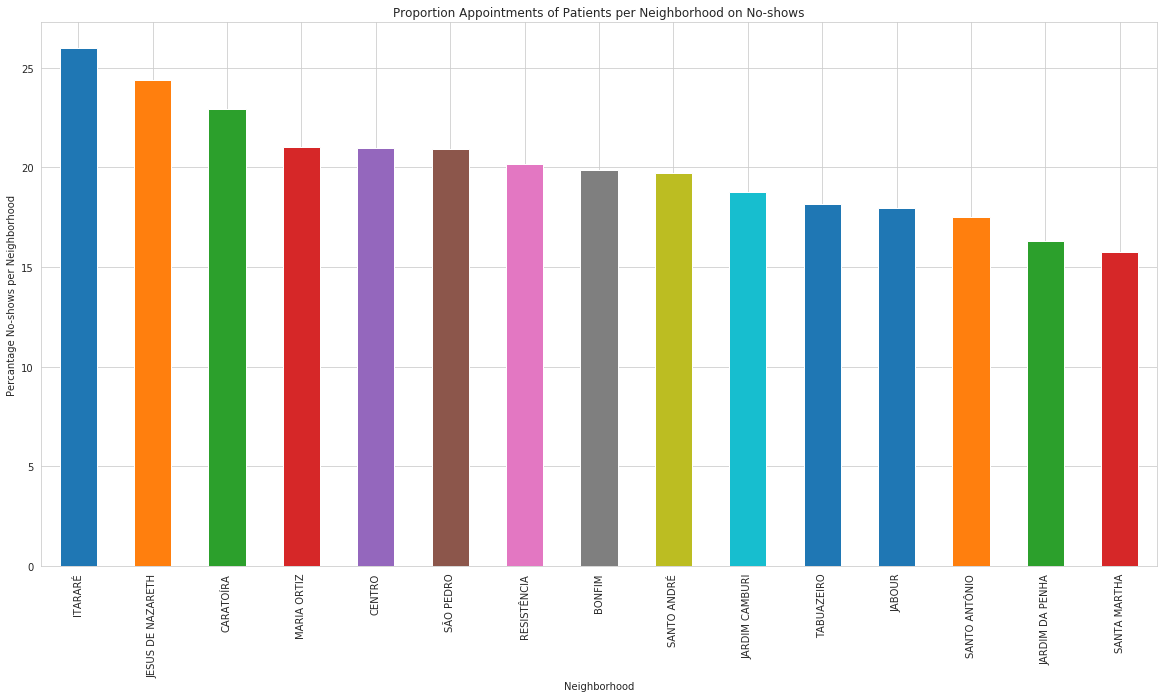

In [45]:
df_amount_appointments_per_hood_top_15_amount_appoint['Percentage_No_Shows'].plot(kind='bar', figsize=(20,10))
sns.set_style('whitegrid')
plt.title('Proportion Appointments of Patients per Neighborhood on No-shows')
plt.ylabel('Percantage No-shows per Neighborhood')
plt.xlabel('Neighborhood');

The evaluation of the No-show proportion per neighborhood large differences. As the 'n' of all displayed neighborhoods is high, we can rely on that picture. Important to note is that in Itararé more than every fourth appointment has been skipped by the patient.

### Research Question 2: Did SMS-reminders decrease the proportion of patients not showing up?

In order answer that research question, we first need to build separate dataframes. One including the patients who received an SMS-reminder and one with patients, who did not receive an SMS-reminder. Thereafter we can analyze the proportions of No-shows within each dataframe.

In [41]:
dfc_sms_received = dfc[(dfc['SMS_received'] == True)]
dfc_no_sms_received = dfc[(dfc['SMS_received'] == False)]

#Grouping by No-show, to calculate the amounts for each case.
sms_received = dfc_sms_received.groupby(['No-show']).sum()['SMS_received']

# As group function in combination with boolean values only works with "True" values, we need to invert 
# the column SMS_received in this case.
dfc_no_sms_received.rename(columns={"SMS_received":"SMS_not_received"}, inplace=True)
dfc_no_sms_received['SMS_not_received'].replace({False: True}, inplace = True)                                                 

no_sms_received = dfc_no_sms_received.groupby(['No-show']).sum()['SMS_not_received']

/home/stefan_cornelissen/anaconda3/envs/pfx-python3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/stefan_cornelissen/anaconda3/envs/pfx-python3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Cross-checking the value distribution of the groupings with the total amount of appointments of the dataset.

In [42]:
print(sms_received)
print('\n')
print(no_sms_received)
print('\n')
print(dfc['AppointmentDay'].count() == sum(sms_received) + sum(no_sms_received))

No-show
False    25698.0
True      9784.0
Name: SMS_received, dtype: float64


No-show
False    62095.0
True     12314.0
Name: SMS_not_received, dtype: float64


True


Since everything looks correct, we can calculate the proportions and visualize them.

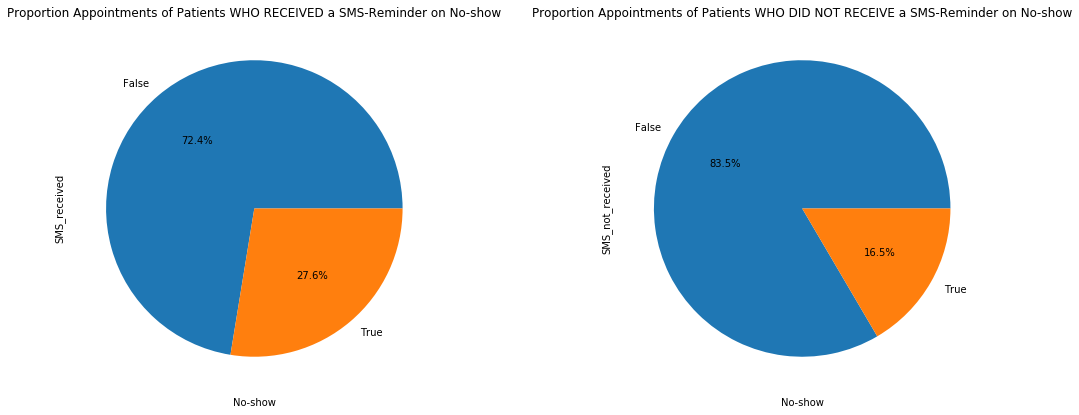

In [43]:
sms_received = sms_received / sum(sms_received) * 100
no_sms_received = no_sms_received / sum(no_sms_received) * 100

# Styling the graphs
fig = plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO RECEIVED a SMS-Reminder on No-show')
plt.xlabel('No-show')

plt.subplot(2,2,2)
no_sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO DID NOT RECEIVE a SMS-Reminder on No-show')
plt.xlabel('No-show');

Surprisingly, the group who received a SMS-reminder did not show up more often compared to those who did not receive a reminder. The group not having received a reminder has a much smaller proportion of No-shows.

<a id='conclusions'></a>
## Conclusions

My analysis revealed that patients without any of the in the dataset stated diseases have higher no-show rates compared to those having a disease. Thereby it does not make much of a difference, which disease (hypertension, diabetes, alcoholism or handicap) the patient suffers.

Furthermore, we saw large differences in no-show proportions between the neighborhoods. We have seen neighborhoods where one out of four to five appointments has a no-show. 

Lastly, and most surprisingly is the fact that for the appointments within this dataset a SMS-reminding the patients of their upcoming appointment made things worse.

### Limitations
The scope of this analysis is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting.

The analysis is limited to trends and only shows value distributions. Causations cannot be drawn. For this purpose, statistical tests and more thorough data segmentations would be required.

###  Suggestions
Next to combining analysis of diseases with other attributes such as neighborhood, or including other available dimensions into this analysis, I find it most interesting to further investigate the SMS-reminder dimension. As most dimensions are rather "back-looking", the insights from SMS-reminder dimension can potentially decrease no-show-proportions.

For example, the dimension Patient-ID may be used to create a "before" and "after" scenario. Therefore, we need to sub segment patients with two or more appointments in the dataset. Next, we analyze the no shows of patients who did not receive a reminder for their first appointment(s). This is the "before" scenario. Then, we compare the proportions to the sub segment of at least "the second appointment" of all patients with multiple appointments who then received a SMS-reminder. This sub segmenting puts the focus on whether a reminder decreases no-shows. There could be patients in the dataset who were mistakenly biased by the reminder in some way.